# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.neighbors import LocalOutlierFactor

%matplotlib inline

# Getting the reduced dims data from the csv

In [2]:
data = pd.read_csv("data.txt", delim_whitespace=True, header=None, dtype='float32')

In [3]:
scaler = StandardScaler()

In [4]:
df = pd.DataFrame(scaler.fit_transform(data))

In [5]:
pca = PCA(n_components=3)
decomposed_data = pca.fit_transform(df)

In [6]:
df = pd.DataFrame(decomposed_data)

# Visualization of the Data

In [7]:
df.head()

,0,1,2
0,14.558610,-20.440176,-20.464081
1,14.537056,-20.445263,-20.461409
2,14.554976,-20.435738,-20.447018
3,14.532762,-20.462633,-20.464050
4,14.524320,-20.428722,-20.490059


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float32
 1   1       10000 non-null  float32
 2   2       10000 non-null  float32
dtypes: float32(3)
memory usage: 117.3 KB


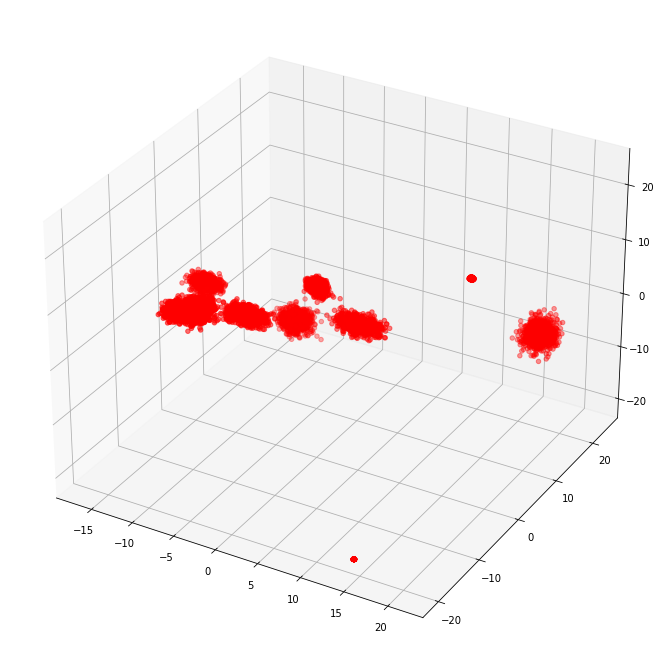

In [9]:
plt.figure(figsize=(15, 12))
ax = plt.axes(projection ="3d")
ax.scatter3D(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], color='r')
plt.show()

#### We can see the global outlier existence with the help of plot

# LOCAL OUTLIER FACTOR Algorithm

In [10]:
lof = LocalOutlierFactor()

#### a. Implement the Local Outlier Factor algorithm to find the LOFs of all the points in the dataset from Q.4.

In [11]:
lof.fit(df)

LocalOutlierFactor()

In [12]:
lof_scores = -lof.negative_outlier_factor_
lof_scores

array([1.02590344, 0.96968794, 1.06042728, ..., 0.98259821, 1.046552  ,
       0.99169241])

In [13]:
lof_scores_df = df.assign(lof_scores=lof_scores)

In [14]:
lof_scores_df

,0,1,2,lof_scores
0,14.558610,-20.440176,-20.464081,1.025903
1,14.537056,-20.445263,-20.461409,0.969688
2,14.554976,-20.435738,-20.447018,1.060427
3,14.532762,-20.462633,-20.464050,1.082618
4,14.524320,-20.428722,-20.490059,1.038092
...,...,...,...,...
9995,-3.109320,6.720825,2.730318,0.998027
9996,-3.218415,7.435681,2.728497,1.010078
9997,-3.620600,6.739038,2.431270,0.982598
9998,-3.787823,6.403878,2.014841,1.046552


#### b) Produce a plot for different values of k (i.e. 1 to 100) that shows the number of outliers. Use a threshold of 2 for deciding if a point is an outlier.

In [15]:
np.count_nonzero(lof_scores > 2)

15

In [16]:
num_of_outliers = []
for k in range(1, 101):
    lof_k = LocalOutlierFactor(n_neighbors=k)
    lof_k.fit(df)
    lof_scores_k = -lof_k.negative_outlier_factor_
    num_of_outliers.append(np.count_nonzero(lof_scores_k > 2))

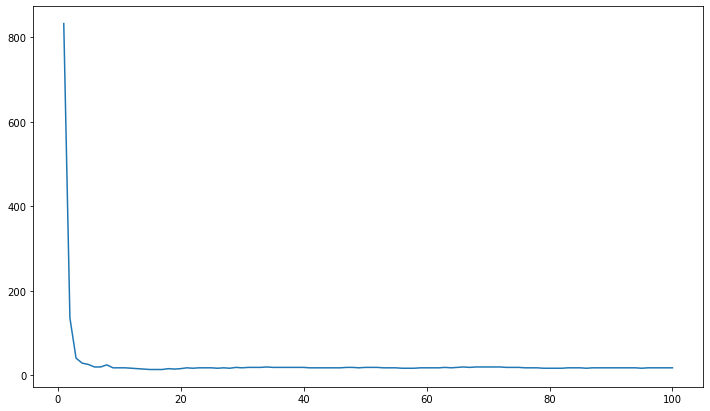

In [17]:
plt.figure(figsize=(12, 7))
plt.plot(range(1, 101), num_of_outliers)
plt.show()